By: Lucas de Freitas <br>
Créditos: Adrian Rosebrock, PhD
<br>Website:https://www.pyimagesearch.com/
<br>Github:https://github.com/lucas-TagDev

#Olá "my friends"
Sejam bem vindos a mais uma colab Visão Computacional!
Sou um jovem entusiasta desse universo incrível que é a visão computadorizada. Venho aqui compartilhar esse algoritmo super interessante que talvez você nunca viu em ação ou que já teve vontade de saber como funciona ou nem se quer viu antes. Segue ai, e Voilà!
Sigam-me em minhas redes socias e apoiem mais tutoriais.
PS: to começando a divulgar agora e aos poucos my friend hahaha!!

#Seção de Download Projeto


Monte seu drive

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


Vamos listar aqui

In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Vamos listar nosso diretorio do projeto no drive

In [12]:
!ls /mydrive/VC/d_idade/*

/mydrive/VC/d_idade/idade_recon.ipynb

/mydrive/VC/d_idade/face_detector:
deploy.prototxt  res10_300x300_ssd_iter_140000.caffemodel

/mydrive/VC/d_idade/idade_detector:
age_deploy.prototxt  age_net.caffemodel

/mydrive/VC/d_idade/imagens:
adrian.png  neil_patrick_harris.png  samuel_l_jackson.png


Vamos copiar nossos arquivos para o diretorio "content" no Colab <br> PS: Siga extamente a estrutura de diretório neste tutorial para não ter erros, caso saiba o que está fazendo use sua própria estrutura de diretório.

In [8]:
!cp -r /mydrive/VC/d_idade/ ../content/

In [9]:
# importe os pacotes necessários
import numpy as np
import argparse
import cv2
import os
from matplotlib import pyplot as plt

In [10]:
# definir a lista de intervalos de idade que nosso detector de idade irá prever
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)",
	"(38-43)", "(48-53)", "(60-100)"]

In [13]:
# carregar modelo de detecção de face
print("[INFO] carregando modelo de faces...")
prototxtPath = "/content/d_idade/face_detector/deploy.prototxt"
weightsPath = "/content/d_idade/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] carregando modelo de faces...


In [14]:
# carregar modelo para detecção de idade
print("[INFO] carregar modelo de detecção de idade...")
prototxtPath = "/content/d_idade/idade_detector/age_deploy.prototxt"
weightsPath = "/content/d_idade/idade_detector/age_net.caffemodel"
ageNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] carregar modelo de detecção de idade...


In [16]:
# carregue a imagem para a entrada e construa um blob de entrada para a imagem
image = cv2.imread("/content/d_idade/imagens/lucas.jpg")
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

In [17]:
# passe o blob pela rede e obtenha as detecções de rosto
print("[INFO] análise de detecção de face...")
faceNet.setInput(blob)
detections = faceNet.forward()

[INFO] análise de detecção de face...


In [19]:
# fazer um loop sobre as detecções
for i in range(0, detections.shape[2]):
	# extrair a confiança (ou seja, probabilidade) associada a
	# predição
	confidence = detections[0, 0, i, 2]

	# filtrar detecções fracas, garantindo que a confiança seja
	# maior do que a confiança mínima	
	if confidence > 0.5: #aqui você pode alterar a pontuação de confiança minima
		# aqui vamos calcular as coordenadas (x, y) da caixa delimitadora para o
		# objeto
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# extrair o ROI (region of interest - região de interesse) do rosto e, em seguida, construir um blob a partir
		# da ROI
		face = image[startY:endY, startX:endX]
		faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
			(78.4263377603, 87.7689143744, 114.895847746),
			swapRB=False)

		# fazer previsões sobre a idade e encontrar a faixa etária com
		# a maior probabilidade correspondente
		ageNet.setInput(faceBlob)
		preds = ageNet.forward()
		i = preds[0].argmax()
		age = AGE_BUCKETS[i]
		ageConfidence = preds[0][i]

		# vamos exibibir a previsão de idades possiveis
		text = "{}: {:.2f}%".format(age, ageConfidence * 100)
		print("[INFO] {}".format(text))

		# desenhe na imagem uma caixa delimitadora no rosto mostrando também a
		# idade prevista com o percentual de probablidade
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

[INFO] (15-20): 97.62%


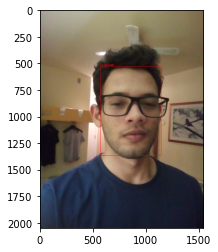

In [24]:
#E Voilà caros amigos!!!  Mostre-me o resultado! Espero que acerte XD
'''plt.imshow(image)
plt.show()'''
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#Obrigado por se interessar nesse tutorial compartilhe com seus amigos e me sigam para mais tutoriais incriveis.